## <b><div style='padding:15px;background-color:#003f88;color:white;border-radius:2px;font-size:110%;text-align: left'>SUPERVISED MACHINE LEARNING GOALS</div></b>

**The major GOAL of every machine learning engineering task is to;**
- To prepare data to build machine learning models
- To build different machine learning models
- To evaluate model accuracy
- To identify the high and low performing models and Optimize the best performing model
- To productionalize or Report Best performing Model

In this Case Study, we are going to zoom in into these goals, now the steps listed  are implemented in an interative manner,
meaning as machine learning engineers, we hardly get the desired output at first trail, instead iterate and go through the phases
listed above till we find a near enough perfect model (thers is nothing like a perfect model) that will suite our
business/organisation use case


## PART A  CLASSIFICATION ANALYSIS
for Regression problems, the goal is to forecast/ predict a continous output, the key differences here are in the type of models we import,
as opposed to a binary or a multi binary output as with the case with classification cases

### ASSIGNMENT TASK 1: carry out a well detailled EDA for the features in the Data set
- Use your data visualization skills to carry out Univariate, Bivariate and Multivariate analaysis and answer the following questions;
- what are the distributions of our target features(Attrition), and  (Monthly income)?
- explore the relationships between the target features with other predictor features
- identify features that are positvely correltaed with our target features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [5]:
df.describe().transpose()
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [6]:
df.describe(include=['object','bool'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,746,701,436,620,232,464,1058,751


In [7]:
# Investigate Missing data
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
num_cols = list(df.select_dtypes(include='number').columns)
cat_cols = df.select_dtypes(exclude='number').columns.tolist()

In [10]:
len(num_cols), len(cat_cols)

(27, 8)

**Analysis of the dataset shows:**
* The data has 1058 enteries and 35 features. 
* The features have data types of which 27 are numeric while 8 are categorical types.
* There are no missing values in the data.
* Features like `EmployeeCount`, `StandardHours`, `Over18` all have just one value, as such they will be removed from the dataset for not having a range of values.
* For the purpose of this analysis, the `EmployeeNumber` feature will also be dropped because it doesn't add any significant information to the dataset except that it is an employee identifier.
* Features `EnvironmentSatisfaction`, `JobSatisfaction`, `RelationshipSatisfaction`, `WorkLifeBalance` and `JobInvolvement` all have 4 unique values. They might be Likert scales

### What are the distributions of our target features(Attrition), and (Monthly income)?

### Univariate Analysis of target variables

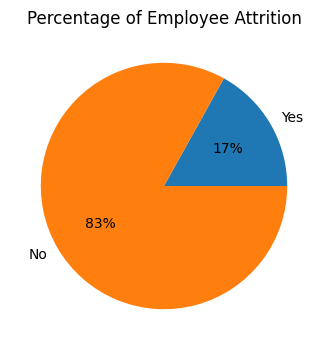

In [11]:
# distributions of our target feature - (Attrition)
fig, ax = plt.subplots(figsize=(5,4))
count = Counter(df['Attrition'])
ax.pie(count.values(), labels=['Yes' if key==1 else 'No' for key in count.keys()], autopct=lambda p:f'{p:.0f}%')
ax.set_title('Percentage of Employee Attrition')
plt.show();

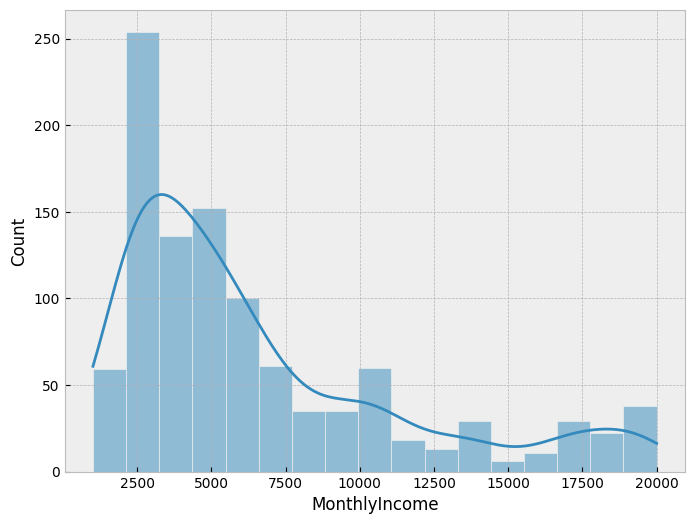

In [12]:
# distribution of our target feature -  (Monthly income)
plt.style.use('bmh')
plt.figure(figsize=(8,6))
sns.histplot(df['MonthlyIncome'], kde=True);

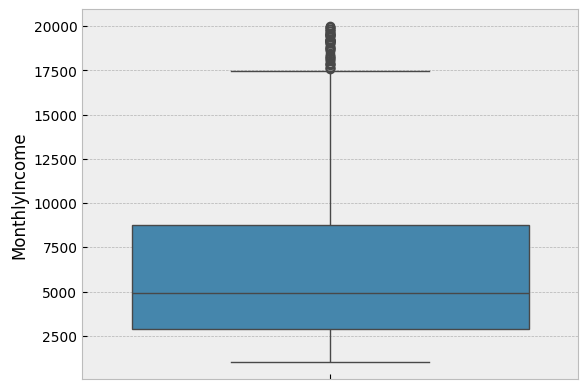

In [13]:
sns.boxplot(y='MonthlyIncome', data=df);

*  Approximately 83% of the employees are retained in the company, while about 17% of the employees left the company.
*  The distribution of the Monthly Income shows a positively skewed distribution. This means there are more employees with lower Monthly Income compared to those with high Monthly Income. The most of the outliers are present in the higher income side of the distribution.

### Explore the relationships between the target features with other predictor features

#### Bivariate Analysis

In [14]:
def attr(att):
    if att == 1:
        return 'Yes'
    else:
        return 'No'
df['label'] = df['Attrition'].apply(attr)

In [15]:
# Age bracket
def age_group(x):
    if x <= 25:
        return "<=25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">=51 Elders"
    
df['age_group'] = df['Age'].apply(age_group)

In [16]:
df['Attrition'].unique()

array([1, 0], dtype=int64)

In [17]:
df.groupby('age_group')['Attrition'].value_counts().unstack()

Attrition,0,1
age_group,,
25-40 Adult,515,104
41-50 Old Adult,203,26
<=25 Young Adult,57,35
>=51 Elders,104,14


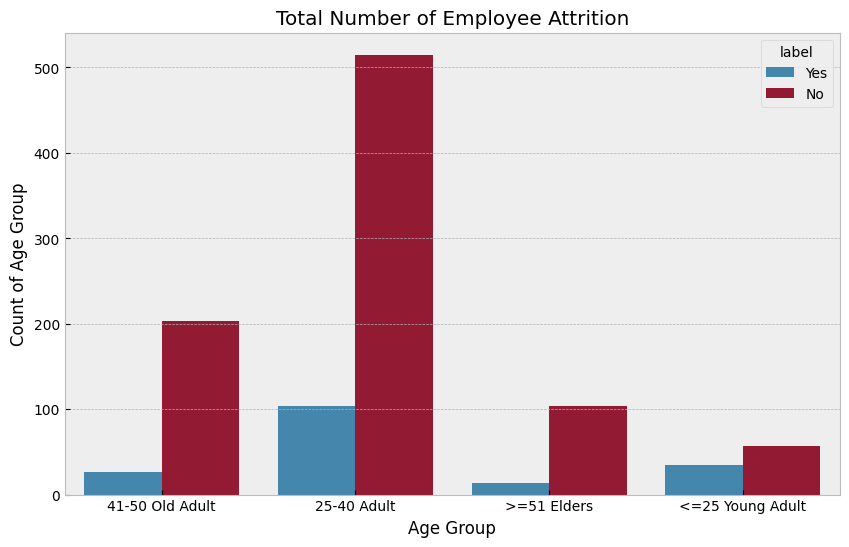

In [18]:
# Investigating the age group and attrition
plt.figure(figsize=(10,6))
sns.countplot(x='age_group', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Employee Attrition');

**Findings**
* Even though the `Adult` category constitute the largest age group in the company, the `Old Adult` representing between `41-50` account for those are retained in the company while the `Young Adult` representing `<=25` account for those that leave the company the most with a 38% attrition based on their population.

In [19]:
df.groupby('Gender')['Attrition'].value_counts().unstack()

Attrition,0,1
Gender,,
Female,367,71
Male,512,108


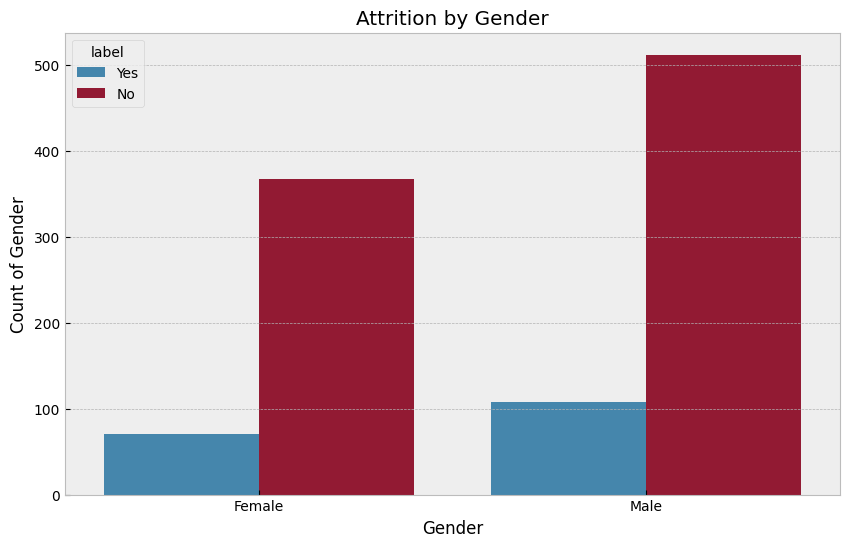

In [20]:
# Investigating the age group and attrition
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Attrition by Gender');

**Findings**  
More males are leaving the company at 17% compared to the female population at 16%.

In [21]:
df.groupby('OverTime')['Attrition'].value_counts().unstack()

Attrition,0,1
OverTime,,
No,670,81
Yes,209,98


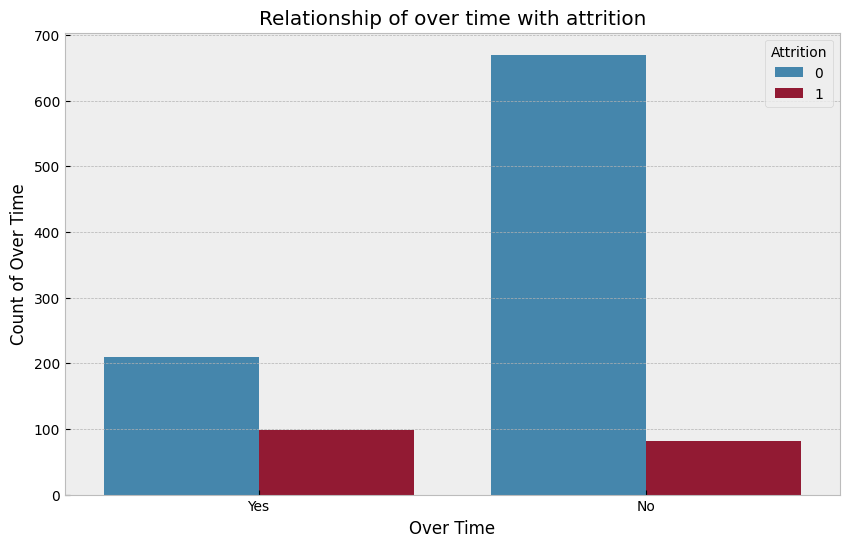

In [22]:
# Investigating the Overtime and attrition
plt.figure(figsize=(10,6))
sns.countplot(x='OverTime', data=df, hue='Attrition')
plt.xlabel('Over Time')
plt.ylabel('Count of Over Time')
plt.title('Relationship of over time with attrition');

**Findings**
It can be seen that a lot of employees working overtime eventually leave the company.

### Identify features that are positvely correltaed with our target features

#### Multivariate Analysis

In [23]:
hm = df[['Age', 'Attrition', 'DailyRate','DistanceFromHome', 'Education', 
        'EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel', 
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 
        'RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears', 
        'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 
        'YearsSinceLastPromotion','YearsWithCurrManager']].corr()

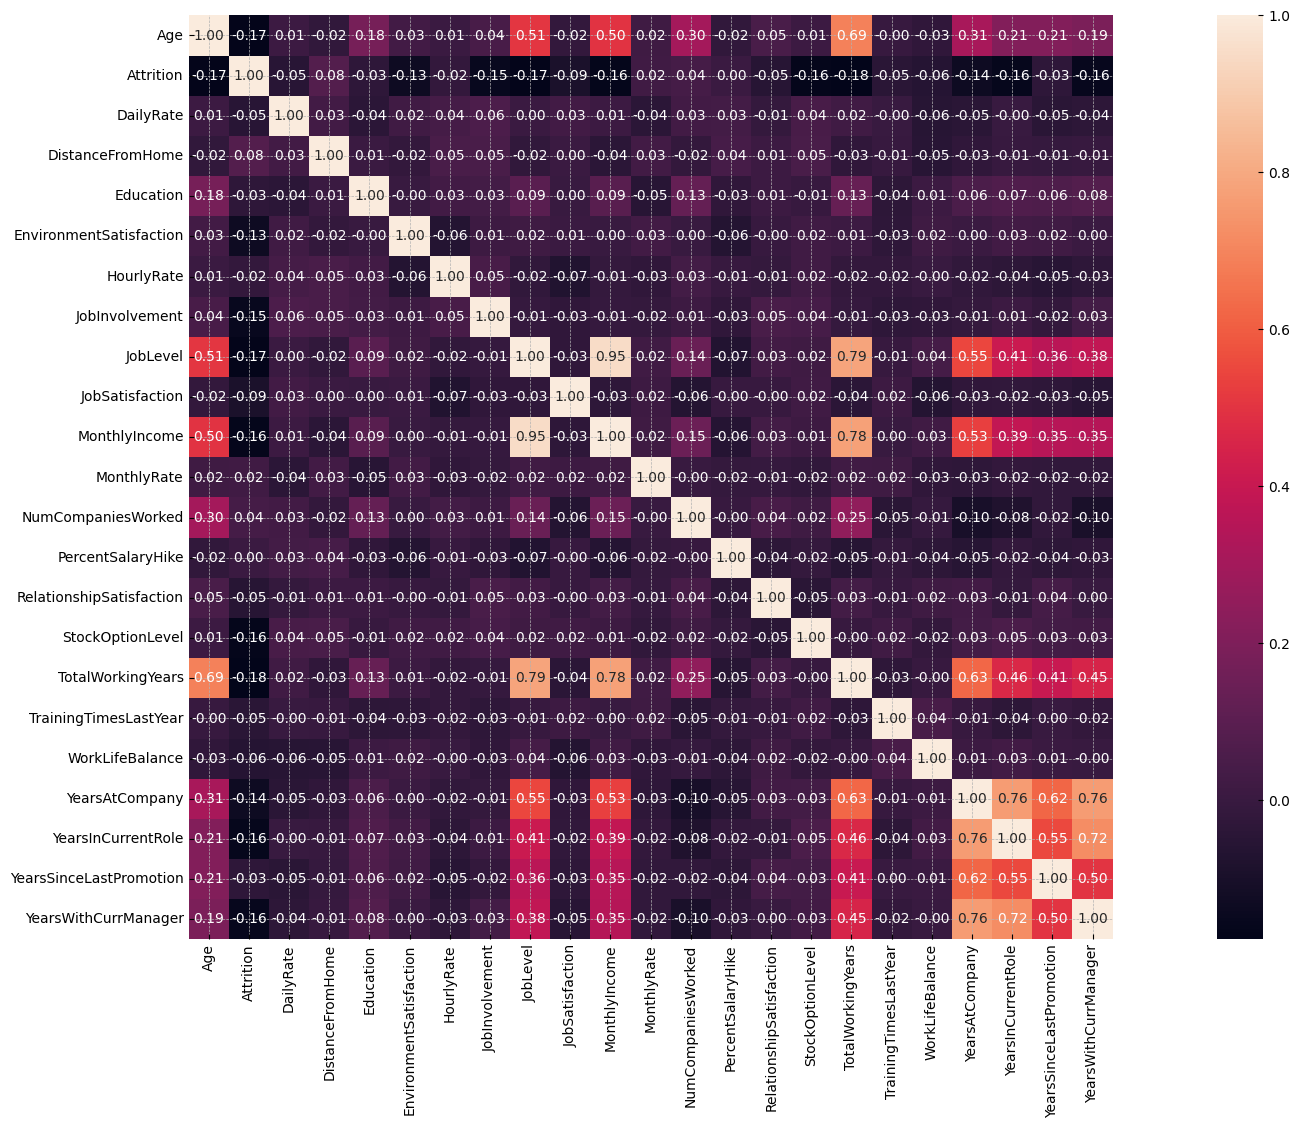

In [24]:
# Correlation between target variable (Attrition) and other variables in the dataset
plt.figure(figsize=(27,12))
sns.heatmap(hm, annot=True, square=True, fmt='.2f', annot_kws={'size':10});

### Phase 1
- Preparing and Processing Data for Modelling
  > data preprocessing,
  > variable encoding,
  > data scaling and normalization

#### Data Preprocessing
- we have identified data issues like, redundant data that will be dropped
- we will then encode the categorical features in the data
- scale the data set
- plot a feature importances visualiztion, to understand features that may be important predictor features from the dataset

**Going from the information from the describe method, we see that columns `Over18`, `StandardHours`, `EmployeeNumber`, and `EmployeeCount` are redundant and do not add any value to the dataset**

In [25]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'label', 'age_group'],
      dtype='object')

In [26]:
#dropping off some redundant features
data = df.drop(['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber', 'label', 'age_group'], axis=1)

In [27]:
#creating a copy of the dataset for part B
df2 = data.copy()

In [28]:
#encode the categorical features to numerical ones
df2 = pd.get_dummies(df2, drop_first=True)

In [29]:
#segmenting target label from the dataset

target = df2.pop('Attrition')

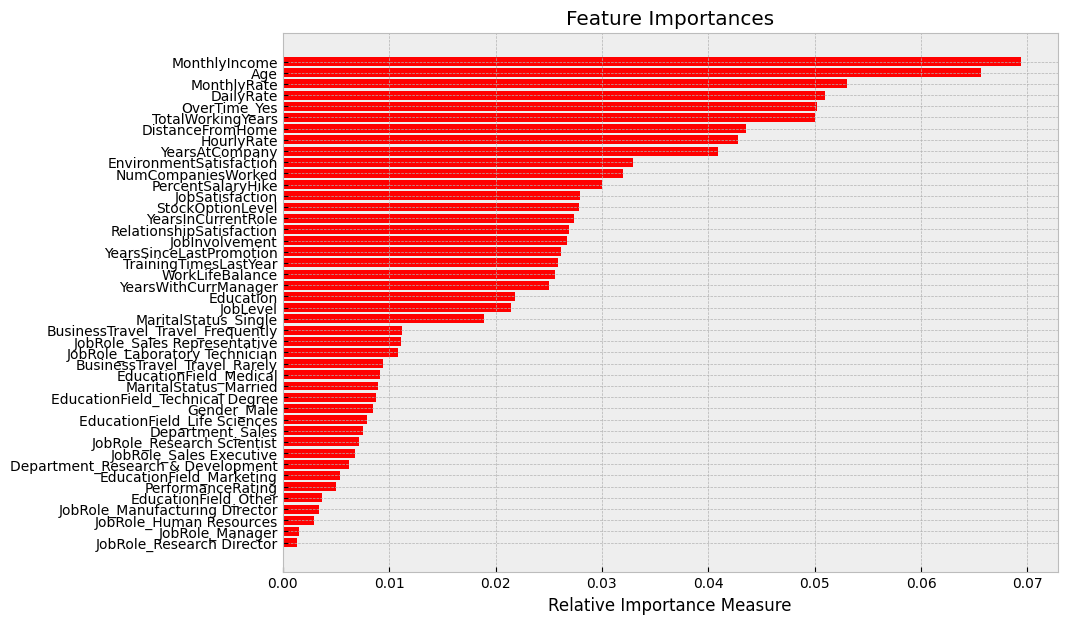

In [30]:
# scale dataset features

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

#identifying key featurs from the data set
#plotting a feature importance chart
model = RandomForestClassifier()
model.fit(df_scaled, target)


#weill use a random classifier model to identify the importance features
importances = model.feature_importances_
sorted_imp = np.argsort(importances)

names = list(df2.columns)

# Plot visualization
plt.figure(figsize=(10,7))
plt.barh(range(len(sorted_imp)), importances[sorted_imp], color='red', align='center')
plt.yticks(range(len(sorted_imp)), [names[x] for x in sorted_imp])
plt.title('Feature Importances')
plt.xlabel('Relative Importance Measure');
# fit the model




* Going by the plot of feature importances, we see that features such as `MonthlyIncome`, `Age`, `Overtime`, `TotalWorkingYears`, `MonthlyRate`, `DailyRate`, `DistanceFromHome`, `HourlyRate`, `YearsAtCompany`, `NumCompaniesWorked`, `EnvironmentSatisfaction`, `PercentSalaryHike`, `StockOptionLevel`, `JobInvolvement`, `TrainingTimesLastYear`, `YearsInCurrentRole`, `YearsWithCurrManager`, `JobSatisfaction`, `YearsSinceLastPromotion`, `WorkLifeBalance`, `RelationshipSatisfaction`, `Education`, and `JobLevel` constitute important predictive fetaures for Attrition.

In [31]:
# importances = model.feature_importances_
# sorted_imp = np.argsort(importances)
# print(importances)
# len(sorted_imp)
# importances[sorted_imp]

### Phase 2
- Splitting data into training and evaluation datasets
- Implementing Machine Learning/model Building and Training
- creating a predictions file

#### Baseline Model

In [32]:
# split the DataFrame into train and test datasets
x_train, x_val, y_train, y_val = train_test_split(df_scaled, target, train_size=0.8, random_state=1)
x_val

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
215,0.547619,0.568361,0.178571,0.50,1.000000,0.642857,0.666667,0.50,1.000000,0.662559,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
663,0.071429,0.948461,0.607143,0.00,1.000000,0.500000,0.666667,0.00,1.000000,0.088678,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
773,0.428571,0.496779,0.392857,1.00,1.000000,0.300000,0.333333,0.50,1.000000,0.413323,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
798,0.357143,0.654975,0.857143,0.50,0.000000,0.357143,0.333333,0.00,0.333333,0.068668,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
629,0.238095,0.763780,0.250000,0.25,0.333333,0.471429,0.333333,0.00,1.000000,0.206793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0.285714,0.092341,0.250000,0.25,0.666667,0.457143,0.666667,0.50,0.666667,0.329384,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
838,0.571429,0.271296,0.392857,0.50,0.666667,0.200000,0.666667,0.75,0.000000,0.671353,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
529,0.476190,0.518969,0.000000,0.75,0.333333,0.042857,1.000000,0.25,1.000000,0.348394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.476190,0.081603,0.785714,0.50,1.000000,0.200000,0.333333,0.50,0.666667,0.448499,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Fit a linear regression model on the training set
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [34]:
# Instantiate model
log_reg = LogisticRegression()

# fit model(training model)
log_reg.fit(x_train, y_train)

LogisticRegression()

In [35]:
log_pred = log_reg.predict(x_val)
log_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Phase 3
- **we will compute the model's r_squared score (r2_score) which is a measure of how "good afit" the linear model is for modelling this kind of data**
- **here we will use business metrics such as the mean squared error(mse) and the root mean squared error (rsme) model Evaluation
to evaluate the linear regression's model's performance**
- we'ill also visualize the plot of the model's predicted label  vs the actual label

In [36]:
# import evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
# Evaluate the model using the test data

print(classification_report(y_val, log_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       173
           1       0.74      0.36      0.48        39

    accuracy                           0.86       212
   macro avg       0.80      0.67      0.70       212
weighted avg       0.85      0.86      0.84       212



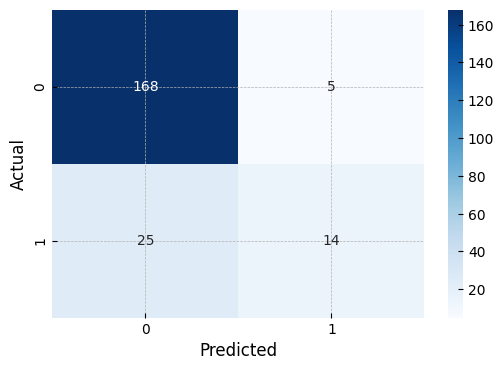

In [38]:
cm = confusion_matrix(y_val, log_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

### Phase 3 Hyper Parameter 0ptimization
- hyperparameter optimization is the art and science of improving our model's performances
- we will be  implementing and optimizing a GradientBoostingRegressor model

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingClassifier()

# Try these hyperparameter values
params = {
    'learning_rate': [0.1,0.5,1],
    'n_estimators': [50,100,150]
}


# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
grid = GridSearchCV(alg, params, scoring=score, cv=3)
grid.fit(x_train, y_train)
print('Best parameter combination:', grid.best_params_, '\n')

# measuring performance on test set
print('Applying best model on test data:')
best_mod = grid.best_estimator_
pred = best_mod.predict(x_val)

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 150} 

Applying best model on test data:


In [40]:
# Evaluate the model using the test data
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       173
           1       0.48      0.31      0.38        39

    accuracy                           0.81       212
   macro avg       0.67      0.62      0.63       212
weighted avg       0.79      0.81      0.79       212



### Building other machine learning models

**Going by the insights gained from the feature importances, we will now limit our predictive features to include only those that have higher Relative Importance Measure to help predict employee attrition. These columns will be `MonthlyIncome`, `Age`, `OverTime`, `TotalWorkingYears`, `MonthlyRate`, `DailyRate`, `DistanceFromHome`, `HourlyRate`, `YearsAtCompany`, `NumCompaniesWorked`, `EnvironmentSatisfaction`, `PercentSalaryHike`, `StockOptionLevel`, `JobInvolvement`, `TrainingTimesLastYear`, `YearsInCurrentRole`, `YearsWithCurrManager`, `JobSatisfaction`, `YearsSinceLastPromotion`, `WorkLifeBalance`, `RelationshipSatisfaction`, `Education`, and `JobLevel`**.

In [41]:
#creating a copy of the dataset for building 
df3 = data[['Age', 'OverTime', 'TotalWorkingYears', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'YearsAtCompany',
           'NumCompaniesWorked', 'EnvironmentSatisfaction', 'PercentSalaryHike', 'StockOptionLevel', 'JobInvolvement', 'TrainingTimesLastYear',
           'YearsInCurrentRole', 'YearsWithCurrManager', 'JobSatisfaction', 'YearsSinceLastPromotion', 'WorkLifeBalance',
           'RelationshipSatisfaction', 'Education', 'JobLevel']].copy()

In [42]:
# Getting our target
#segmenting target label from the dataset

df3_target = data[['Attrition']]

In [43]:
#encode the categorical features to numerical ones
df3 = pd.get_dummies(df3, drop_first=True)

In [44]:
print(df3.shape, df3_target.shape)

(1058, 21) (1058, 1)


In [45]:
# scale dataset features

scaler = MinMaxScaler()
df3_scaled = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)

In [46]:
# split the dataset into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(df3_scaled, df3_target, test_size=0.2, random_state=42)

In [47]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((846, 21), (846, 1), (212, 21), (212, 1))

In [48]:
# Machine learning algorithms will be applied to the dataset
classifiers =  [[XGBClassifier(), 'XGB Classifier'],
              [RandomForestClassifier(), 'Random Forest'],
              [KNeighborsClassifier(), 'K-Nearest Neighbors'],
              [SGDClassifier(), 'SGD Classifier'],
              [SVC(), 'SVC'],
              [GaussianNB(), 'Naive Bayes'],
              [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
              [LogisticRegression(), 'Logistic Regression']
              ]

In [49]:
acc_dict = {}
precision_dict = {}
recall_dict = {}
roc_dict = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]

    pred = model.predict(x_val)

    a_score = accuracy_score(y_val, pred)
    p_score = precision_score(y_val, pred)
    r_score = recall_score(y_val, pred)
    roc_score = roc_auc_score(y_val, pred)

    acc_dict[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_dict[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_dict[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_dict[model_name] = ([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')

In [50]:
xgb = XGBClassifier()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
sgd = SGDClassifier()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression()

In [51]:
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_val)

rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_val)

knc.fit(x_train, y_train)
knc_pred = knc.predict(x_val)

sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_val)

svc.fit(x_train, y_train)
svc_pred = svc.predict(x_val)

gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_val)

dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_val)

lr.fit(x_train, y_train)
lr_pred = lr.predict(x_val)

In [52]:
# Confusion Matrix
xgb_cm = confusion_matrix(y_val, xgb_pred)
rfc_cm = confusion_matrix(y_val, rfc_pred)
knc_cm = confusion_matrix(y_val, knc_pred)
sgd_cm = confusion_matrix(y_val, sgd_pred)
svc_cm = confusion_matrix(y_val, svc_pred)
gnb_cm = confusion_matrix(y_val, gnb_pred)
dtc_cm = confusion_matrix(y_val, dtc_pred)
lr_cm = confusion_matrix(y_val, lr_pred)

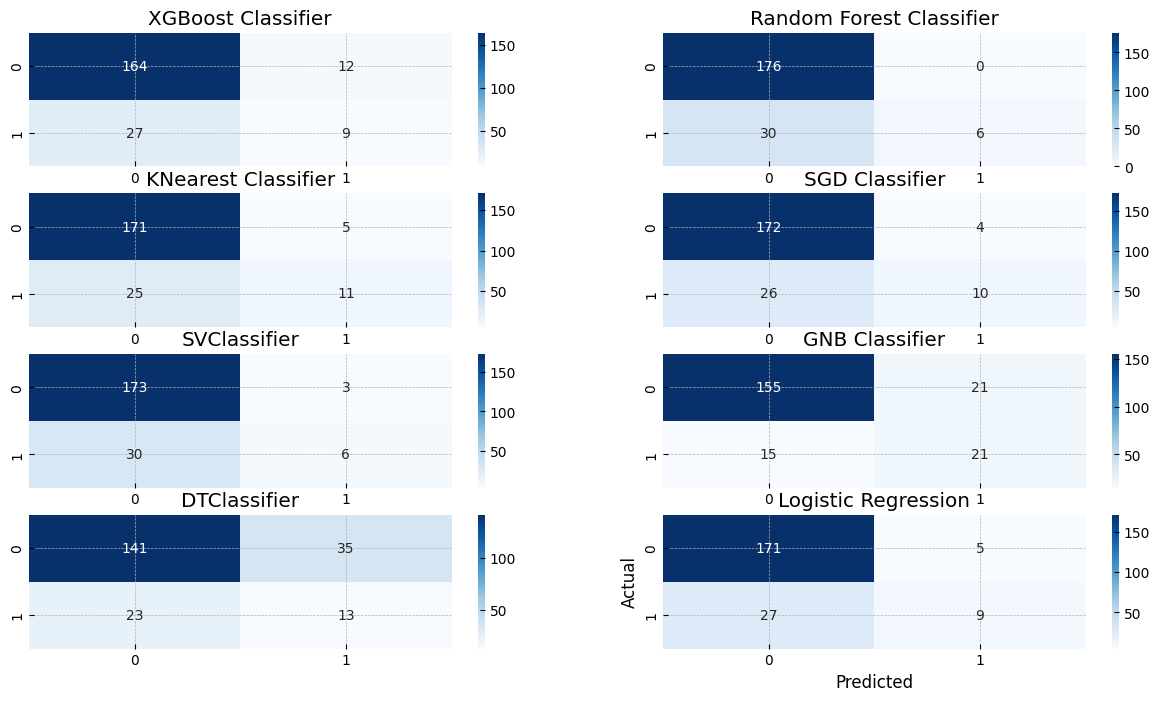

In [53]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,8))

sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='g', ax=ax[0,0])
ax[0,0].set_title('XGBoost Classifier')

sns.heatmap(rfc_cm, annot=True, cmap='Blues', fmt='g', ax=ax[0,1])
ax[0,1].set_title('Random Forest Classifier')

sns.heatmap(knc_cm, annot=True, cmap='Blues', fmt='g', ax=ax[1,0])
ax[1,0].set_title('KNearest Classifier')

sns.heatmap(sgd_cm, annot=True, cmap='Blues', fmt='g', ax=ax[1,1])
ax[1,1].set_title('SGD Classifier')

sns.heatmap(svc_cm, annot=True, cmap='Blues', fmt='g', ax=ax[2,0])
ax[2,0].set_title('SVClassifier')

sns.heatmap(gnb_cm, annot=True, cmap='Blues', fmt='g', ax=ax[2,1])
ax[2,1].set_title('GNB Classifier')

sns.heatmap(dtc_cm, annot=True, cmap='Blues', fmt='g', ax=ax[3,0])
ax[3,0].set_title('DTClassifier')

sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g', ax=ax[3,1])
ax[3,1].set_title('Logistic Regression')

plt.xlabel('Predicted')
plt.ylabel('Actual');

In [54]:
accuracy = pd.DataFrame(acc_dict)
precision = pd.DataFrame(precision_dict)
recall = pd.DataFrame(recall_dict)
roc = pd.DataFrame(roc_dict)

In [55]:
model_results = pd.concat([accuracy, precision, recall, roc], ignore_index=True)

In [56]:
model_results = model_results.rename(index={0: 'Accuracy', 1: 'Precision', 2: 'Recall', 3: 'AUC-ROC'})

In [57]:
model_results

,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
Accuracy,81.6%,86.79%,85.85%,83.02%,84.43%,83.02%,72.64%,84.91%
Precision,42.86%,100.0%,68.75%,50.0%,66.67%,50.0%,27.08%,64.29%
Recall,25.0%,22.22%,30.56%,50.0%,16.67%,58.33%,36.11%,25.0%
AUC-ROC,59.09%,61.11%,63.86%,69.89%,57.48%,73.2%,58.11%,61.08%


### Concluding Remarks for our model's prediction on Employee Attrition
* **Running the dataset on eight different machine learning models, it is seen that the Random Forest Classifier model performed best  in correctly predicting the employees that would leave the company (`174`) and eventually left, and those that will not leave and did not eventually leave (`7`).**
* **We thus submit this as the best performing model and productionize it.**

### Productionizing Our Model
this is the last stage of the machine learning pipeline, and the main aim here points to how the users use/consume the model.
there are alot of ways an ML Model can be used
- it can be embedded into an application to be used by users online via an API on  web interfaces or on mobile devices
- It can be used to create reports or dashboards that will be used by the organisation in making key business decisions
- it can be consumed via streaming or batch methods

**In this case scenario, we will simulate the use of the model on a new dataset and use it to make relevant predictions**

* **We will take the Random Forest Classifier model which is our best performing model and productionize it.**

In [58]:
test_data = pd.read_csv('test.csv')

In [59]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# Save the model as a pickle file
filename = 'optimized_log_mod.pkl'
joblib.dump(rfc, filename)

['optimized_log_mod.pkl']

**Now to stimulate a typical production environment, we will use the test data set( the other data set in the data folder) as the new employeedata set to
predict**

In [60]:
# Apply transforms to the new data similar to the training dataset
test_data = test_data[['Age', 'OverTime', 'TotalWorkingYears', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'YearsAtCompany',
           'NumCompaniesWorked', 'EnvironmentSatisfaction', 'PercentSalaryHike', 'StockOptionLevel', 'JobInvolvement', 'TrainingTimesLastYear',
           'YearsInCurrentRole', 'YearsWithCurrManager', 'JobSatisfaction', 'YearsSinceLastPromotion', 'WorkLifeBalance',
           'RelationshipSatisfaction', 'Education', 'JobLevel']]

In [61]:
test_data = pd.get_dummies(test_data, drop_first=True)

# Inference
prediction = rfc.predict(test_data)

In [62]:
test_data['predicted_attrition'] = prediction
test_data

,Age,TotalWorkingYears,DailyRate,DistanceFromHome,HourlyRate,YearsAtCompany,NumCompaniesWorked,EnvironmentSatisfaction,PercentSalaryHike,StockOptionLevel,...,YearsInCurrentRole,YearsWithCurrManager,JobSatisfaction,YearsSinceLastPromotion,WorkLifeBalance,RelationshipSatisfaction,Education,JobLevel,OverTime_Yes,predicted_attrition
0,34,16,790,24,40,15,0,1,23,0,...,9,10,2,10,4,3,4,2,True,1
1,35,1,660,7,76,1,1,4,13,1,...,0,0,3,0,3,1,1,1,False,0
2,24,4,381,9,89,0,2,2,11,0,...,0,0,1,0,2,3,3,1,True,1
3,24,1,830,13,78,1,1,4,13,1,...,0,0,2,0,3,3,2,1,False,0
4,44,16,1193,2,86,2,5,2,18,0,...,2,2,3,2,2,2,1,3,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,17,884,23,41,5,4,3,17,1,...,2,3,4,0,3,3,2,2,False,1
408,39,9,613,6,42,7,4,4,15,1,...,7,7,1,1,3,1,1,3,False,1
409,27,6,155,4,87,6,1,2,20,1,...,2,3,2,0,3,2,3,2,True,1
410,49,17,1023,2,63,9,2,4,14,0,...,6,8,2,0,2,4,3,2,False,0
